# Experimento 4: NNs varios locutores

In [1]:
from os import listdir
from os.path import isdir, join
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
from scipy.io import wavfile

### Load features

In [2]:
feature_sets_file = 'mfcc_sets_BD2.npz'
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x', 'y', 'words']

In [3]:
words = feature_sets['words']
print(words)

['zero' 'one' 'two' 'three' 'four' 'five' 'six' 'seven' 'eight' 'nine'
 'yes' 'no' 'up' 'down' 'left' 'right' 'on' 'off' 'stop' 'go']


In [4]:
x = feature_sets['x']
y = feature_sets['y']
print(x.shape)
print(y.shape)

(70608, 20, 99)
(70608,)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
# Split MFFCC coefficients into random train, test and validation subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print("Train files : ",len(x_train))
print("Test files : ", len(x_test))
print("Validation files : ", len(x_val))

Train files :  50837
Test files :  14122
Validation files :  5649


In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(50837, 20, 99)
(5649, 20, 99)
(14122, 20, 99)


In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
x_val = tf.keras.utils.normalize(x_val, axis=1)

In [16]:
# Build model
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(140, activation='relu'))
model.add(layers.Dense(140, activation='relu'))
model.add(layers.Dense(140, activation='relu'))
model.add(layers.Dense(140, activation='relu'))
model.add(layers.Dense(len(words), activation='softmax'))

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
EPOCHS = 20
history = model.fit(
    x_train, 
    y_train,  
    epochs=EPOCHS,
    validation_data=(x_val, y_val)
)

Epoch 1/20
1589/1589 [==============================] - 6s 4ms/step - loss: 1.4922 - accuracy: 0.5239 - val_loss: 1.0546 - val_accuracy: 0.6617
Epoch 2/20
1589/1589 [==============================] - 9s 6ms/step - loss: 0.8525 - accuracy: 0.7263 - val_loss: 0.8982 - val_accuracy: 0.7134
Epoch 3/20
1589/1589 [==============================] - 5s 3ms/step - loss: 0.6296 - accuracy: 0.7962 - val_loss: 0.8589 - val_accuracy: 0.7348
Epoch 4/20
1589/1589 [==============================] - 6s 4ms/step - loss: 0.4918 - accuracy: 0.8399 - val_loss: 0.8332 - val_accuracy: 0.7582
Epoch 5/20
1589/1589 [==============================] - 6s 4ms/step - loss: 0.3978 - accuracy: 0.8699 - val_loss: 0.8603 - val_accuracy: 0.7555
Epoch 6/20
1589/1589 [==============================] - 5s 3ms/step - loss: 0.3257 - accuracy: 0.8920 - val_loss: 0.8816 - val_accuracy: 0.7617
Epoch 7/20
1589/1589 [==============================] - 6s 4ms/step - loss: 0.2801 - accuracy: 0.9063 - val_loss: 1.0543 - val_accuracy:

In [19]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 76%


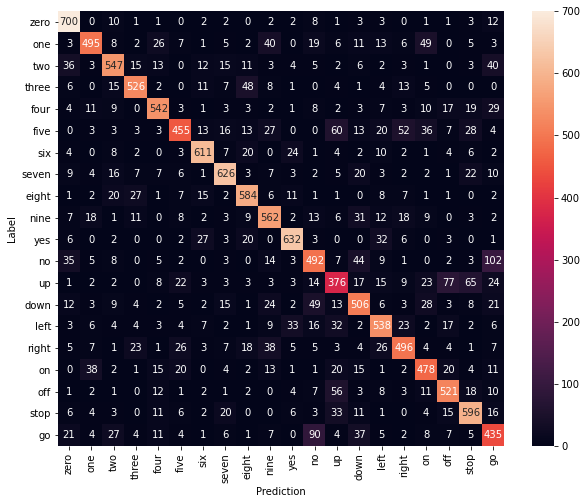

In [20]:
import seaborn as sns
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=words, yticklabels=words, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [21]:

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print('Accuracy Score :',accuracy_score(y_true, y_pred)*100 )
print('Report : ')
print(classification_report(y_true, y_pred, target_names= words))

Accuracy Score : 75.8957654723127
Report : 
              precision    recall  f1-score   support

        zero       0.81      0.93      0.87       752
         one       0.82      0.71      0.76       701
         two       0.79      0.76      0.77       721
       three       0.83      0.81      0.82       651
        four       0.82      0.80      0.81       677
        five       0.78      0.60      0.68       756
         six       0.85      0.86      0.86       711
       seven       0.83      0.83      0.83       756
       eight       0.79      0.84      0.81       697
        nine       0.73      0.78      0.76       717
         yes       0.86      0.86      0.86       737
          no       0.67      0.67      0.67       735
          up       0.59      0.56      0.58       670
        down       0.69      0.71      0.70       716
        left       0.74      0.75      0.75       714
       right       0.76      0.73      0.74       684
          on       0.71      0.74    